## Exercises

The end result of this exercise should be a Jupyter notebook named model.

Use either the SAAS dataset or the store data and:

- Split data (train/validate/test) and resample by any period except daily. Aggregate using the sum.
- Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
- Simple Average
- Moving Average
- Holt's Linear Trend Model
- Based on previous year/month/etc., this is up to you.

### Bonus

Using the store data:

- Predict 2018 total monthly sales for a single store and/or item by creating a model.
- Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper). The upper and lower bounds of the predictions are auto generated when using the facebook prophet model, or you could calculate your own using, for example, bollinger bands.
- Plot the 2018 monthly sales predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [3]:
df = prepare.prep_sales_data()

In [4]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


In [5]:
df = df.rename(columns={'sale_amount':'items_sold'})

In [6]:
df

,item_id,items_sold,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,34,21.0,619014,9,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,TX,78221,December,Sunday,87.57
2017-12-31,34,32.0,620840,10,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,TX,78231,December,Sunday,133.44
2017-12-31,35,55.0,622666,1,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,December,Sunday,285.45


In [7]:
df.store_state.value_counts()

TX    913000
Name: store_state, dtype: int64

In [8]:
df = df.drop(columns='store_state')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   items_sold     913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  month          913000 non-null  object 
 13  day            913000 non-null  object 
 14  sales_total    913000 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 111.5+ MB


In [11]:
df = df.drop(columns=['item_upc12', 'item_upc14'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   items_sold     913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   store_address  913000 non-null  object 
 8   store_city     913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  month          913000 non-null  object 
 11  day            913000 non-null  object 
 12  sales_total    913000 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ MB


In [15]:
df = df.resample('d')[['sales_total','items_sold']].sum()

In [16]:
# remove leap day for the sake of congruent seasonal analysis
df = df_resampled[df_resampled.index != '2016-02-29']

In [17]:
df

,sales_total,items_sold
sale_date,,
2013-01-01,73844.01,13696.0
2013-01-02,73570.58,13678.0
2013-01-03,78169.48,14488.0
2013-01-04,84467.73,15677.0
2013-01-05,87621.85,16237.0
...,...,...
2017-12-27,109151.15,20378.0
2017-12-28,117377.49,21885.0
2017-12-29,126541.84,23535.0


In [18]:
int(len(df) * 0.5)

912

In [19]:
train_size = int(len(df) * 0.5)

In [20]:
validate_size = int(len(df) * 0.3)

In [21]:
test_size = int(len(df) - train_size - validate_size)

In [22]:
len(df) == train_size + validate_size + test_size

True

In [23]:
validate_end_index = train_size + validate_size

In [24]:
train = df[:train_size]

In [25]:
validate = df[train_size:validate_end_index]

In [26]:
test = df[validate_end_index:]

In [27]:
train.size, validate.size, test.size

(1824, 1094, 732)

In [28]:
df.size == train.size + validate.size + test.size

True

In [29]:
print(df.head(1) == train.head(1))

            sales_total  items_sold
sale_date                          
2013-01-01         True        True


In [30]:
pd.concat([train.tail(1), validate.head(1)])

,sales_total,items_sold
sale_date,,
2015-07-01,164573.20,30703.0
2015-07-02,178036.64,33134.0


In [31]:
pd.concat([validate.tail(1), test.head(1)])

,sales_total,items_sold
sale_date,,
2016-12-30,120033.64,22296.0
2016-12-31,128009.31,23792.0


In [32]:
test.tail(1) == df.tail(1)

,sales_total,items_sold
sale_date,,
2017-12-31,True,True


In [33]:
train.columns == df.columns

array([ True,  True])

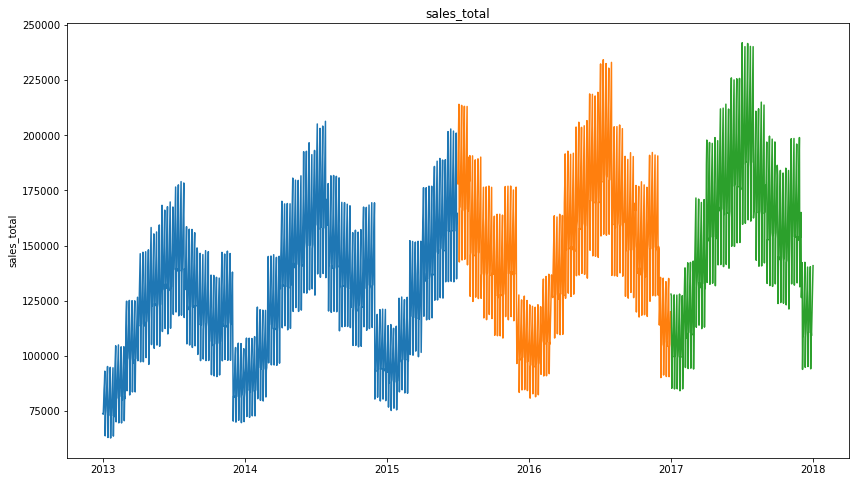

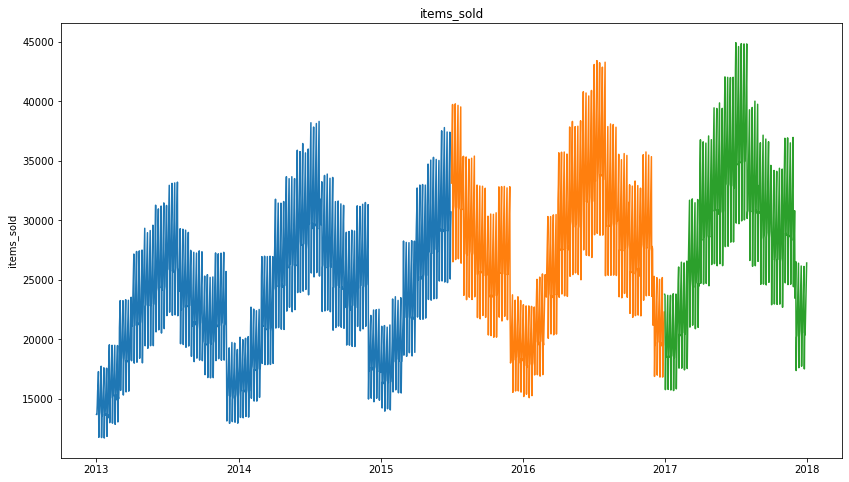

In [34]:
for col in df.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [35]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(mean_squared_error(validate[target_var], yhat_df[target_var], squared=False), 0)
    return rmse


In [36]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [37]:
# create an empty dataframe
eval_df = pd.DataFrame(
    columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [38]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


In [39]:
train['sales_total'][-1:][0]

164573.2

In [40]:
# take the last item of dollars sold and assign to variable
dollars = train['sales_total'][-1:][0]
dollars

164573.2

In [41]:
# take the last item of dollars sold and assign to variable
items = train['items_sold'][-1:][0]
items

30703.0

In [43]:
yhat_df = pd.DataFrame(
{
    'sales_total': [dollars],
    'items_sold': [items]},
    index=validate.index
)
yhat_df.head()

,sales_total,items_sold
sale_date,,
2015-07-02,164573.2,30703.0
2015-07-03,164573.2,30703.0
2015-07-04,164573.2,30703.0
2015-07-05,164573.2,30703.0
2015-07-06,164573.2,30703.0


items_sold -- RMSE: 6621


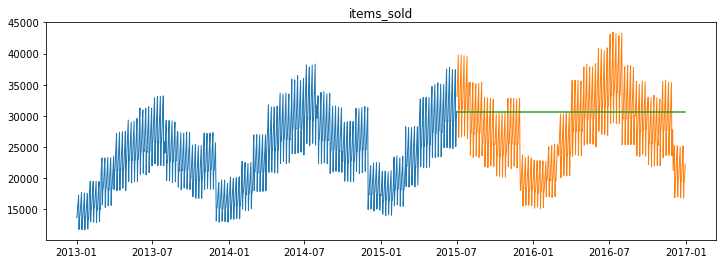

In [44]:
plot_and_eval('items_sold')

sales_total -- RMSE: 35402


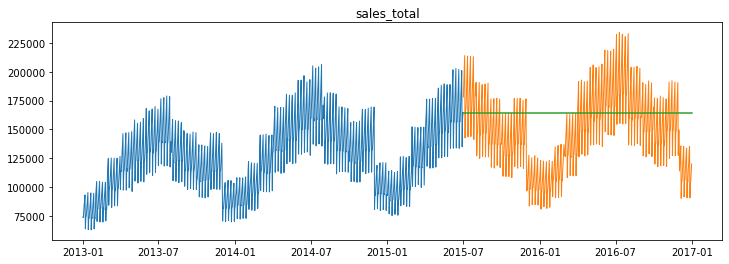

In [45]:
plot_and_eval('sales_total')

sales_total -- RMSE: 35402


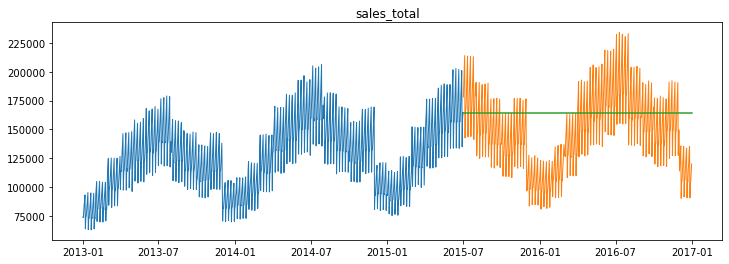

items_sold -- RMSE: 6621


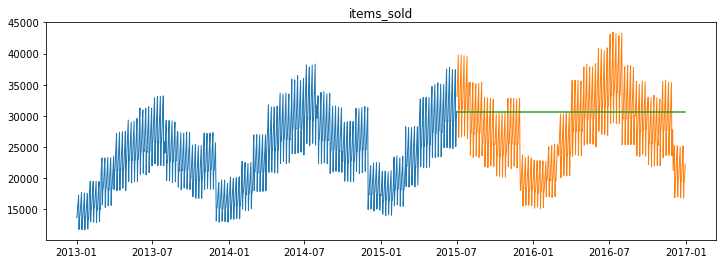

In [46]:
for col in train.columns:
    plot_and_eval(col)

In [47]:
validate.head(2)

,sales_total,items_sold
sale_date,,
2015-07-02,178036.64,33134.0
2015-07-03,190981.55,35498.0


In [48]:
eval_df

,model_type,target_var,rmse


In [49]:
for col in train.columns:
    eval_df = append_eval_df(model_type='last_observed_value',
                            target_var = col)
eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,sales_total,35402.0
1,last_observed_value,items_sold,6621.0


In [50]:
# compute simple average
dollars = round(train['sales_total'].mean(), 2)
dollars

127517.85

In [51]:
items = round(train['items_sold'].mean(), 2)

In [52]:
items

23717.94

In [53]:
def make_predictions(dollars=None, items=None):
    yhat_df = pd.DataFrame({'sales_total': [dollars],
                           'items_sold': [items]},
                          index=validate.index)
    return yhat_df

In [54]:
yhat_df = make_predictions(dollars, items)

In [55]:
yhat_df.head(3)

,sales_total,items_sold
sale_date,,
2015-07-02,127517.85,23717.94
2015-07-03,127517.85,23717.94
2015-07-04,127517.85,23717.94


sales_total -- RMSE: 39664


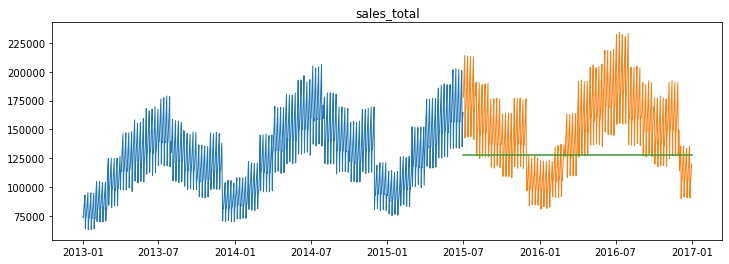

items_sold -- RMSE: 7378


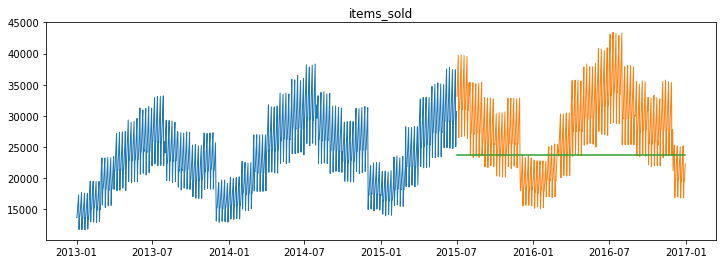

In [56]:
for col in train.columns:
    plot_and_eval(col)

In [57]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,sales_total,35402.0
1,last_observed_value,items_sold,6621.0
2,simple_average,sales_total,39664.0
3,simple_average,items_sold,7378.0


In [58]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30
train['sales_total'].rolling(30).mean()

sale_date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2015-06-27    169307.076000
2015-06-28    170365.098000
2015-06-29    168925.788333
2015-06-30    167925.392000
2015-07-01    168957.912000
Name: sales_total, Length: 912, dtype: float64

In [59]:
period = 30

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
dollars = round(train['sales_total'].rolling(period).mean()[-1], 2)
items = round(train['items_sold'].rolling(period).mean()[-1], 2)
print(dollars, items)

168957.91 31432.77


In [60]:
yhat_df = make_predictions(dollars, items)
yhat_df.head()

,sales_total,items_sold
sale_date,,
2015-07-02,168957.91,31432.77
2015-07-03,168957.91,31432.77
2015-07-04,168957.91,31432.77
2015-07-05,168957.91,31432.77
2015-07-06,168957.91,31432.77


sales_total -- RMSE: 37378


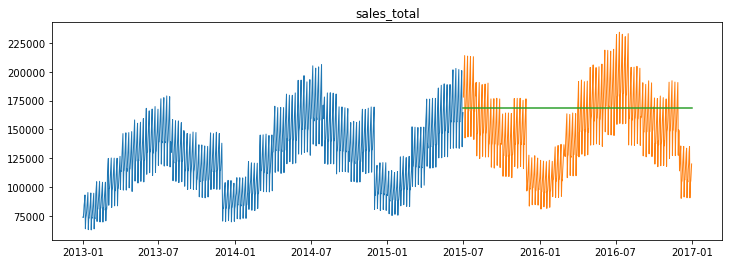

items_sold -- RMSE: 6954


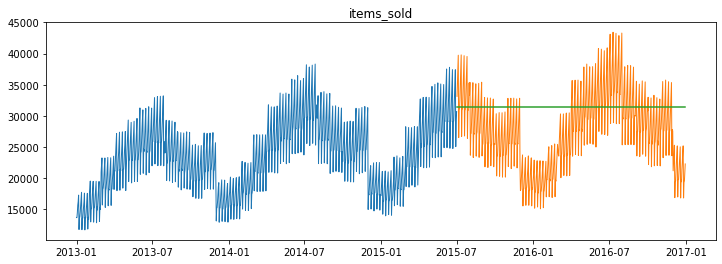

In [61]:
for col in train.columns:
    plot_and_eval(col)

In [62]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '30d_moving_avg', 
                            target_var = col)

eval_df

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,sales_total,35402.0
1,last_observed_value,items_sold,6621.0
2,simple_average,sales_total,39664.0
3,simple_average,items_sold,7378.0
4,30d_moving_avg,sales_total,37378.0
5,30d_moving_avg,items_sold,6954.0


In [63]:
periods = [4, 12, 26, 52, 104]

for p in periods: 
    dollars = round(train['sales_total'].rolling(p).mean()[-1], 2)
    items = round(train['items_sold'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(dollars, items)
    model_type = str(p) + '_day_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [64]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,35402.0
1,last_observed_value,items_sold,6621.0
2,simple_average,sales_total,39664.0
3,simple_average,items_sold,7378.0
4,30d_moving_avg,sales_total,37378.0
5,30d_moving_avg,items_sold,6954.0
6,4_day_moving_avg,sales_total,35515.0
7,4_day_moving_avg,items_sold,6592.0
8,12_day_moving_avg,sales_total,37644.0
9,12_day_moving_avg,items_sold,6992.0


In [65]:
eval_df[eval_df.target_var == 'sales_total']

,model_type,target_var,rmse
0,last_observed_value,sales_total,35402.0
2,simple_average,sales_total,39664.0
4,30d_moving_avg,sales_total,37378.0
6,4_day_moving_avg,sales_total,35515.0
8,12_day_moving_avg,sales_total,37644.0
10,26_day_moving_avg,sales_total,37640.0
12,52_day_moving_avg,sales_total,35322.0
14,104_day_moving_avg,sales_total,32803.0


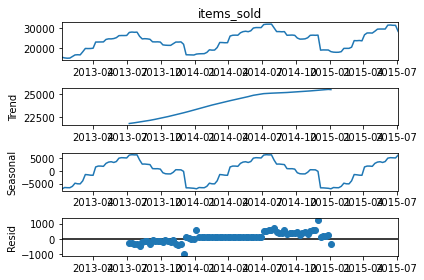

In [66]:
sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()
plt.show()

In [67]:
train.columns

Index(['sales_total', 'items_sold'], dtype='object')

In [68]:
col = 'sales_total' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1277571358.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train[col], exponential=False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [70]:
model = model.fit(optimized=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [72]:
yhat_items

2015-07-02    170207.533835
2015-07-03    170328.012629
2015-07-04    170447.286634
2015-07-05    170565.367899
2015-07-06    170682.268352
                  ...      
2016-12-26    182204.029938
2016-12-27    182204.543770
2016-12-28    182205.052464
2016-12-29    182205.556070
2016-12-30    182206.054641
Freq: D, Length: 548, dtype: float64

In [73]:
# doing this in a loop for each column
for col in train.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1794298677.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train[col], exponential=False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1794298677.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train[col], exponential=False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequen

sales_total -- RMSE: 44226


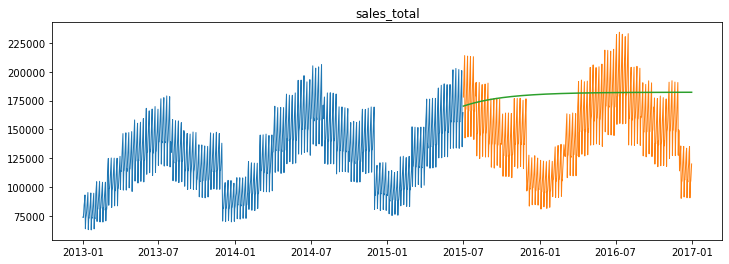

items_sold -- RMSE: 8225


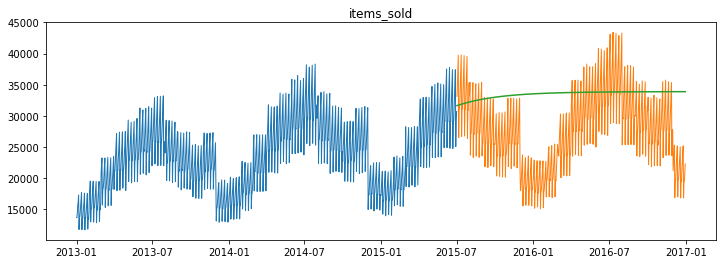

In [74]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [75]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [76]:
eval_df[eval_df['target_var'] == 'sales_total'].sort_values(by='rmse')

,model_type,target_var,rmse
14,104_day_moving_avg,sales_total,32803.0
12,52_day_moving_avg,sales_total,35322.0
0,last_observed_value,sales_total,35402.0
6,4_day_moving_avg,sales_total,35515.0
4,30d_moving_avg,sales_total,37378.0
10,26_day_moving_avg,sales_total,37640.0
8,12_day_moving_avg,sales_total,37644.0
2,simple_average,sales_total,39664.0
16,holts_optimized,sales_total,44226.0


sales_total -- RMSE: 44226


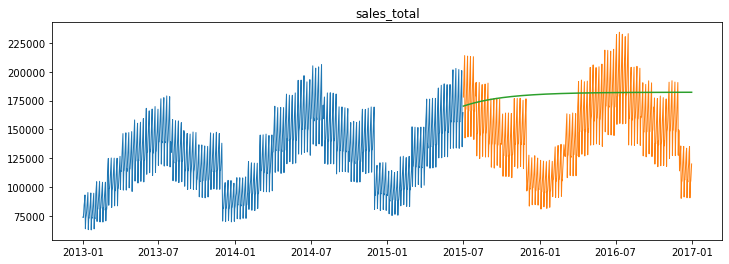

items_sold -- RMSE: 8225


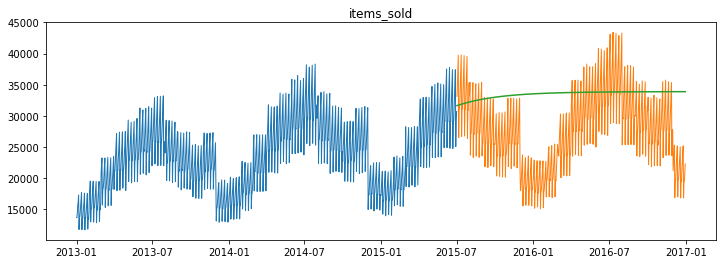

In [77]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [78]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_.1', 
                            target_var = col)
eval_df.sort_values(by='rmse')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
15,104_day_moving_avg,items_sold,6101.0
13,52_day_moving_avg,items_sold,6563.0
7,4_day_moving_avg,items_sold,6592.0
1,last_observed_value,items_sold,6621.0
5,30d_moving_avg,items_sold,6954.0
9,12_day_moving_avg,items_sold,6992.0
11,26_day_moving_avg,items_sold,7004.0
3,simple_average,items_sold,7378.0
17,holts_optimized,items_sold,8225.0
19,holts_.1,items_sold,8225.0


In [79]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

print(train.shape)
print(validate.shape)
print(test.shape)

train.head()
train.tail()


(1095, 2)
(365, 2)
(365, 2)


,sales_total,items_sold
sale_date,,
2015-12-27,125125.86,23268.0
2015-12-28,84297.45,15569.0
2015-12-29,98602.75,18403.0
2015-12-30,97773.10,18191.0
2015-12-31,103969.42,19377.0


In [80]:
pd.concat([train.tail(1), validate.head(1)])

,sales_total,items_sold
sale_date,,
2015-12-31,103969.42,19377.0
2016-01-01,107875.26,20158.0


In [81]:
# finding the year-over-year difference for each day from 2013 to 2015
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df = train['2015'] + train.diff(365).mean()

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/780873468.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  yhat_df = train['2015'] + train.diff(365).mean()


In [82]:
train.diff(365).mean()

sales_total    11751.250493
items_sold      2185.813699
dtype: float64

In [83]:
yhat_df

,sales_total,items_sold
sale_date,,
2015-01-01,104337.620493,19411.813699
2015-01-02,112870.770493,20904.813699
2015-01-03,118245.300493,21983.813699
2015-01-04,125496.760493,23286.813699
2015-01-05,88551.940493,16420.813699
...,...,...
2015-12-27,136877.110493,25453.813699
2015-12-28,96048.700493,17754.813699
2015-12-29,110354.000493,20588.813699


In [84]:
pd.concat([yhat_df.head(1), validate.head(1)])

,sales_total,items_sold
sale_date,,
2015-01-01,104337.620493,19411.813699
2016-01-01,107875.260000,20158.000000


In [85]:
# set yhat_df to index of validate
yhat_df.index = validate.index

In [86]:
yhat_df.describe()

,sales_total,items_sold
count,365.000000,365.000000
mean,152236.991370,28314.271233
std,31264.033981,5816.407123
min,87009.270493,16153.813699
25%,128679.520493,23977.813699
50%,150024.320493,27913.813699
75%,177535.990493,33022.813699
max,225791.620493,41979.813699


sales_total -- RMSE: 28087


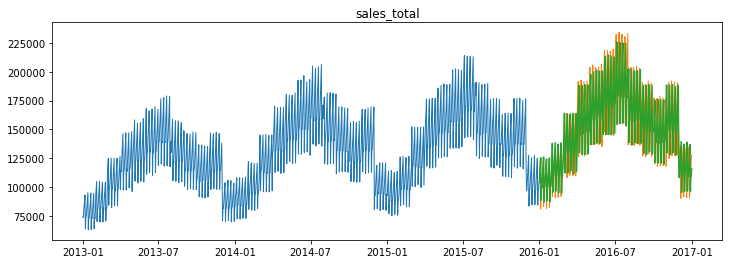

items_sold -- RMSE: 5223


/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


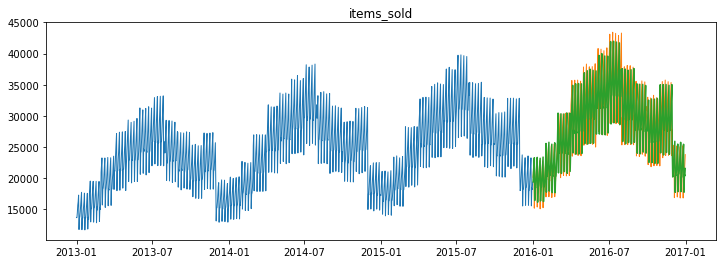

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_6673/1407114492.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [87]:
for col in train.columns:
    plot_and_eval(target_var = col)
    eval_df = append_eval_df(model_type = "previous_year", 
                            target_var = col)

In [88]:
dollars_min_rmse = eval_df.groupby('target_var')['rmse'].min()[0]

items_min_rmse = eval_df.groupby('target_var')['rmse'].min()[1]

# find which model that is
eval_df[((eval_df.rmse == dollars_min_rmse) | 
         (eval_df.rmse == items_min_rmse))]

,model_type,target_var,rmse
20,previous_year,sales_total,28087.0
21,previous_year,items_sold,5223.0


In [89]:
yhat_df = validate + train.diff(365).mean()
yhat_df.index = test.index

In [90]:
yhat_df

,sales_total,items_sold
sale_date,,
2017-01-01,119626.510493,22343.813699
2017-01-02,126081.680493,23465.813699
2017-01-03,134896.160493,25096.813699
2017-01-04,92625.220493,17384.813699
2017-01-05,107181.150493,19991.813699
...,...,...
2017-12-27,115409.140493,21526.813699
2017-12-28,117065.190493,21745.813699
2017-12-29,124973.100493,23296.813699


In [91]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], label='train')
    plt.plot(validate[target_var], label='validate')
    plt.plot(test[target_var], label='test')
    plt.plot(yhat_df[target_var], alpha=.5)
    plt.title(target_var)
    plt.show()

In [92]:
rmse_dollars = sqrt(mean_squared_error(test['sales_total'], 
                                       yhat_df['sales_total']))

rmse_items = sqrt(mean_squared_error(test['items_sold'], 
                                       yhat_df['items_sold']))


In [93]:
print('rmse-dollars_sold: ', rmse_dollars)
print('rmse-items_sold: ', rmse_items)

rmse-dollars_sold:  27114.786014988116
rmse-items_sold:  5040.989142541608


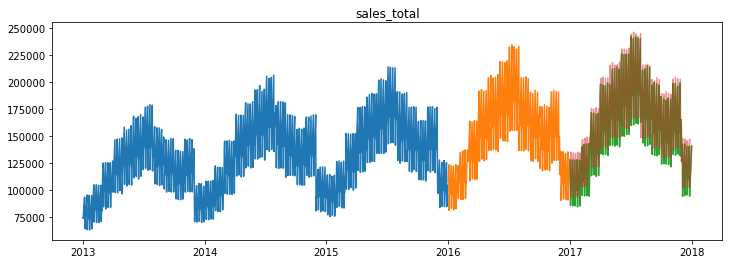

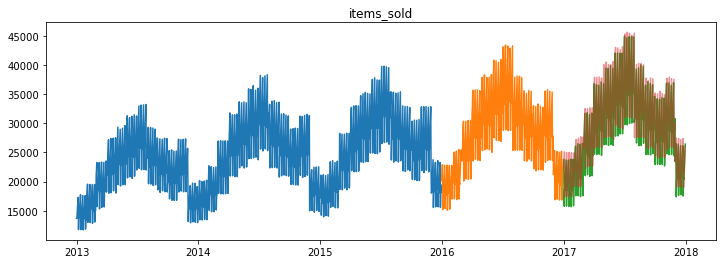

In [94]:
for col in train.columns:
    final_plot(col)